In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import bezier
import seaborn as sns
from IPython.display import Image, display
from masks import Mask

In [2]:
video_info = pd.read_csv("../EchoNet-Dynamic/VolumeTracings.csv")
video_info.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


In [2]:
path = "../EchoNet-Dynamic/images/"
files = os.listdir(path)

In [4]:
AMOUNT_OF_IMAGES = 1

In [3]:
files[0]

'0X7C076CFBDD1CB990_40.jpeg'

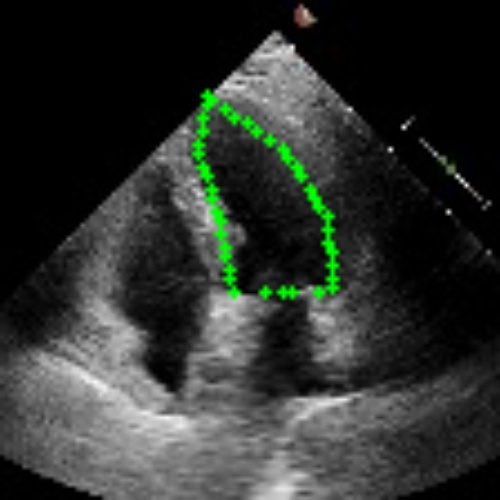

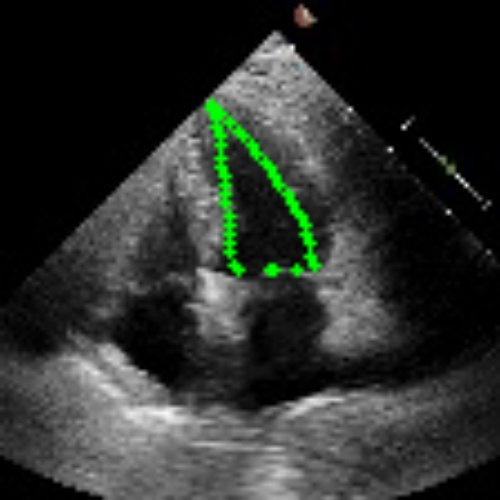

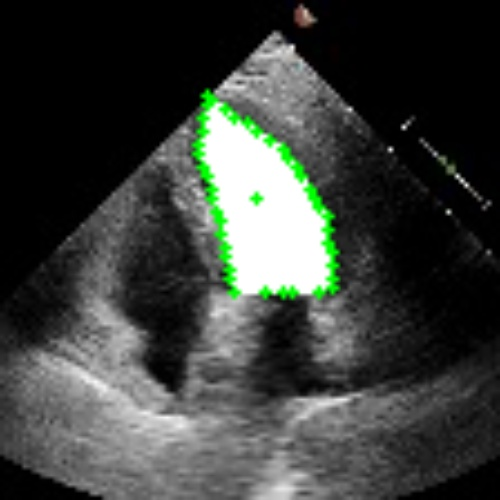

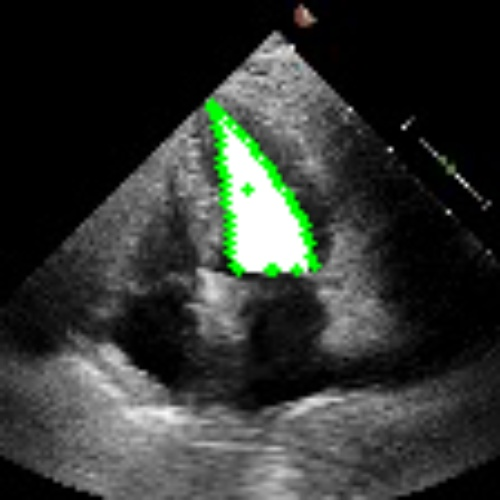

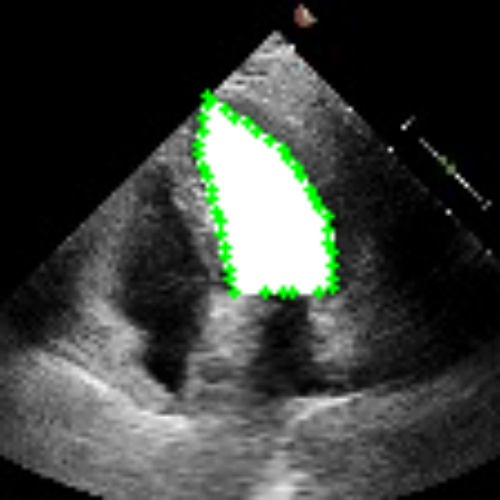

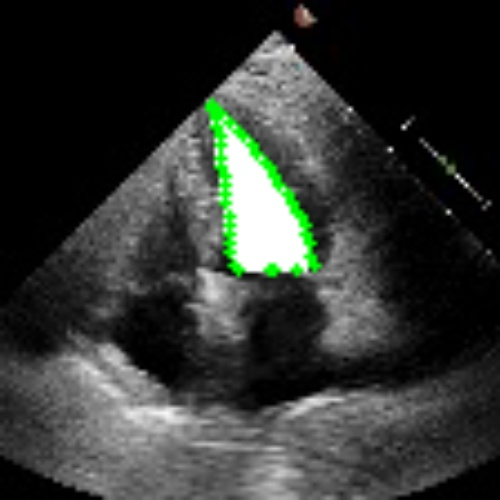

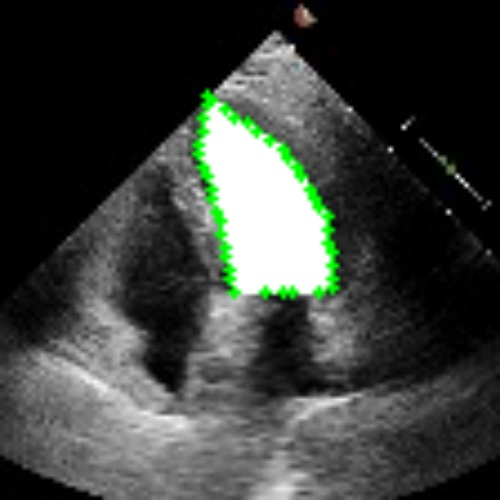

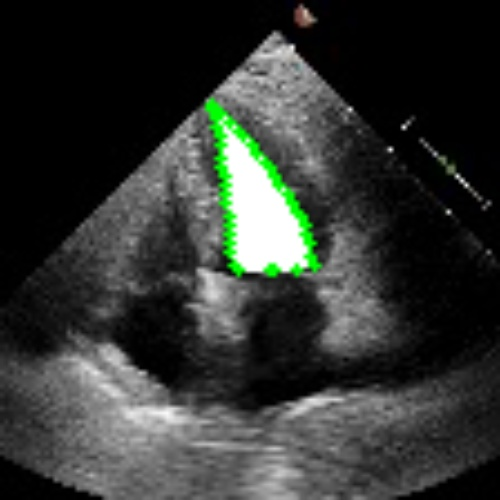

In [8]:
mask = Mask(
    video_info=video_info,
    amount_of_frames=3,
    images_files_array=files,
    path=path,
)

mask.show(mask_type="points")
mask.show(mask_type="centroid", include_points=True, show_centroid=True)
mask.show(mask_type="convex", include_points=True)
mask.show(mask_type="simple_sort", include_points=True)

In [ ]:
TRAIN_IMG_DIR = "../data/train_images/"
TRAIN_MASK_DIR = "../data/train_masks/"
VAL_IMG_DIR = "../data/val_images/"
VAL_MASK_DIR = "../data/val_masks/"

FILE_LOWER_RANGE = 5000
FILE_HIGHER_RANGE = 7500

In [ ]:
def save_image_with_mask():
    for file in files[FILE_LOWER_RANGE:FILE_HIGHER_RANGE]:
        path_file = os.path.join(path, file)

        cap = cv2.VideoCapture(path_file)
        frames = video_info[video_info.FileName == file]["Frame"].unique()

        for frame in frames:
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
            coor = video_info[
                (video_info.FileName == file) & (video_info.Frame == frame)
            ]
            puntos1 = [
                (int(row["X1"]), int(row["Y1"])) for index, row in coor.iterrows()
            ]
            puntos2 = [
                (int(row["X2"]), int(row["Y2"])) for index, row in coor.iterrows()
            ]

            sorted_puntos1 = sorted(puntos1, key=lambda x: x[1])
            sorted_puntos2 = sorted(puntos2, key=lambda x: x[1])

            sorted_puntos2.reverse()

            poly = np.array(
                np.concatenate((sorted_puntos1, sorted_puntos2), axis=0).tolist(),
                np.int32,
            )
            
            
            name_image = os.path.join(
                VAL_IMG_DIR, file[0:-4] + "_" + str(frame) + ".jpg"
            )
            cv2.imwrite(name_image, img)

            img1 = np.zeros(img.shape[:2], dtype=np.uint8)
            cv2.fillPoly(img1, [poly], 255)

            name = os.path.join(
                VAL_MASK_DIR, file[0:-4] + "_" + str(frame) + ".jpg"
            )
            cv2.imwrite(name, img1)

            cv2.waitKey(0)
            cv2.destroyAllWindows()


save_image_with_mask()